In [1]:
# from sympy import *
# init_printing()
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy

In [2]:
# from sympy import Sum
# Ra, La  = symbols('Ra, La')

# F_net,a,m =symbols('F_net,a,m')
# T_net,J =symbols('T_net,J')

# Sum(Ra, (La, 1, Ra))

# i = Symbol('i', integer=True)

# Te = sympy.Symbol('Te')
# T_load = sympy.Symbol('T_load')
# J = sympy.Symbol('J')
# F = sympy.Symbol('F')

In [3]:
print("Newton's second law")
display(Symbol(r' F_{net}= \frac{\partial v}{\partial t} \cdot m'))

Newton's second law


 F_{net}= \frac{\partial v}{\partial t} \cdot m

In [4]:
print("Circular motion version")
display(Symbol(r' T_{net}= \frac{\partial \omega_m}{\partial t} \cdot J'))
print("Adding up all the torque")
display(Symbol(r' T_{net}= T_e-T_{load}-T_{static}-B_v \cdot \omega_m '))
print("Combining everything gives")
display(Symbol(r' \frac{\partial \omega_m}{\partial t}=\frac{T_e-T_{load}-T_{static}-B_v \cdot \omega_m}{J}'))
print("I could attempt to do this with differential equation, but it would be easier to use Laplace")

Circular motion version


 T_{net}= \frac{\partial \omega_m}{\partial t} \cdot J

Adding up all the torque


 T_{net}= T_e-T_{load}-T_{static}-B_v \cdot \omega_m 

Combining everything gives


 \frac{\partial \omega_m}{\partial t}=\frac{T_e-T_{load}-T_{static}-B_v \cdot \omega_m}{J}

I could attempt to do this with differential equation, but it would be easier to use Laplace


In [5]:
s = symbols('s')

# Define the variables
w_m, T_e, T_load, T_static, B_v, J, t = symbols('omega_m T_e T_load T_static B_v J t')

# Define the equation
eq = Eq(Derivative(w_m, t), (T_e - T_load - T_static - B_v * w_m) / J)

# Extract the right-hand side of the equation
rhs = eq.rhs

# Compute the Laplace transform
lt = laplace_transform(rhs, t, s, noconds=True)

# Simplify the result
lt = pretty(lt)

# # Generate a LaTeX representation of the result
# lt_latex = latex(lt)

# Display the result
print(lt)

  Bᵥ⋅ωₘ   Tₑ   T_load   T_static
- ───── + ── - ────── - ────────
    J     J      J         J    
────────────────────────────────
               s                


In [6]:
print("The above code can be rewritten as:")
display(Symbol(r' \omega_m=\frac{1}{J} \frac{1}{s} (T_e - T_{load} - T_{static} - B_v * w_m) '))
print("I can assume that T_static=0")

The above code can be rewritten as:


 \omega_m=\frac{1}{J} \frac{1}{s} (T_e - T_{load} - T_{static} - B_v * w_m) 

I can assume that T_static=0


Blocks representation


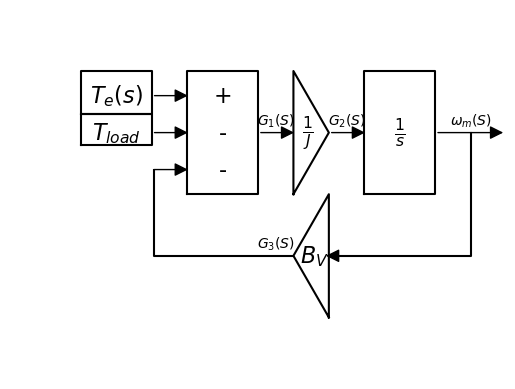

In [7]:
print("Blocks representation")

# Define s as a symbolic variable
s = Symbol('s')

# Create a figure and axis
fig, ax = plt.subplots()

# Displacement blocks variables
X_origin=0
Y_origin=0

X_arrow_displacement=0.5
Y_text_allign=0.5
X_block_displacement=1
Y_block_displacement=1

# Output arrows
arrow_output = patches.FancyArrowPatch((X_block_displacement, Y_text_allign), ( (2*X_arrow_displacement+X_block_displacement), Y_text_allign),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_output)
ax.text((X_arrow_displacement+X_block_displacement), 0.6, r'$\omega_m(S)$', ha='center', va='center')

# 1/s block
block_x = [X_origin, X_block_displacement, X_block_displacement, X_origin,X_origin]
block_y = [Y_origin, Y_origin, Y_block_displacement, Y_block_displacement,Y_origin]
ax.plot(block_x, block_y, 'k-')
ax.text(0.5, 0.5, r'$\frac{1}{s}$', ha='center', va='center', fontsize=16)

# Arrow to 1/s block
arrow_output = patches.FancyArrowPatch((-X_arrow_displacement, Y_text_allign), (0.05, Y_text_allign),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_output)
ax.text( -(X_arrow_displacement/2), 0.6, r'$G_2(S)$', ha='center', va='center')

# 1/J gain triangle
block_x = [-(2*X_arrow_displacement), -X_arrow_displacement,-(2*X_arrow_displacement),-(2*X_arrow_displacement)]
block_y = [Y_origin, Y_text_allign,Y_block_displacement,Y_origin]
ax.plot(block_x, block_y, 'k-')
ax.text(-0.8, Y_text_allign, r'$\frac{1}{J}$', ha='center', va='center', fontsize=16)

# Arrow to 1/J gain triangle
arrow_output = patches.FancyArrowPatch((-(3*X_arrow_displacement), Y_text_allign), (-0.95, Y_text_allign),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_output)
ax.text( -(X_block_displacement+X_arrow_displacement/2), 0.6, r'$G_1(S)$', ha='center', va='center')

# Sum/Subtract block
block_x = [-(3*X_arrow_displacement+X_block_displacement), -(3*X_arrow_displacement), -(3*X_arrow_displacement),-(3*X_arrow_displacement+X_block_displacement),-(3*X_arrow_displacement+X_block_displacement)]
block_y = [Y_origin, Y_origin, Y_block_displacement, Y_block_displacement,Y_origin]
ax.plot(block_x, block_y, 'k-')
ax.text(-2*X_block_displacement, 0.8, '+', ha='center', va='center', fontsize=16)
ax.text(-2*X_block_displacement, 0.5, '-', ha='center', va='center', fontsize=16)
ax.text(-2*X_block_displacement, 0.2, '-', ha='center', va='center', fontsize=16)

# Te block
block_x = [-(4*X_arrow_displacement+2*X_block_displacement), -(4*X_arrow_displacement+X_block_displacement), -(4*X_arrow_displacement+X_block_displacement), -(4*X_arrow_displacement+2*X_block_displacement),-(4*X_arrow_displacement+2*X_block_displacement)]
block_y = [0.65, 0.65, 1, 1,0.65]
ax.plot(block_x, block_y, 'k-')
ax.text(-3.5, 0.8, r'$T_e(s)$', ha='center', va='center', fontsize=16)

# Arrow from Te
arrow_input = patches.FancyArrowPatch((-(4*X_arrow_displacement+X_block_displacement), 0.8), (-2.45, 0.8),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_input)

# T_load block
block_x = [-(4*X_arrow_displacement+2*X_block_displacement), -(4*X_arrow_displacement+X_block_displacement), -(4*X_arrow_displacement+X_block_displacement), -(4*X_arrow_displacement+2*X_block_displacement),-(4*X_arrow_displacement+2*X_block_displacement)]
block_y = [0.4, 0.4, 0.65, 0.65,0.4]
ax.plot(block_x, block_y, 'k-')
ax.text(-3.5, 0.5, r'$T_{load}$', ha='center', va='center', fontsize=16)

# Arrow from Te
arrow_input = patches.FancyArrowPatch((-(4*X_arrow_displacement+X_block_displacement), Y_text_allign), (-2.45, Y_text_allign),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_input)

# Bv gain triangle
block_x = [-(X_arrow_displacement), -(X_block_displacement),-(X_arrow_displacement),-(X_arrow_displacement)]
block_y = [Y_origin-Y_block_displacement, Y_text_allign-Y_block_displacement,Y_block_displacement-Y_block_displacement,Y_origin-Y_block_displacement]
ax.plot(block_x, block_y, 'k-')
ax.text(-0.7, Y_text_allign-Y_block_displacement, r'$B_V$', ha='center', va='center', fontsize=16)

# Arrow from Bv
arrow_input = patches.FancyArrowPatch((-(4*X_arrow_displacement+X_block_displacement), 0.2), (-2.45, 0.2),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_input)
block_x = [-(4*X_arrow_displacement+X_block_displacement-0.03), -(4*X_arrow_displacement+X_block_displacement-0.03), -X_block_displacement]
block_y = [0.2, -Y_text_allign, -Y_text_allign]
ax.plot(block_x, block_y, 'k-')
ax.text( -(X_block_displacement+X_arrow_displacement/2), -0.4, r'$G_3(S)$', ha='center', va='center')

# Arrow to Bv
arrow_output = patches.FancyArrowPatch((-0.05, -Y_text_allign), (-(X_arrow_displacement+0.08), -Y_text_allign),mutation_scale=20, lw=1, arrowstyle='-|>', color='k')
ax.add_patch(arrow_output)
block_x = [ (X_arrow_displacement+X_block_displacement),  (X_arrow_displacement+X_block_displacement)  , (X_arrow_displacement-X_block_displacement)  ]
block_y = [ Y_text_allign, -Y_text_allign , -Y_text_allign ]
ax.plot(block_x, block_y, 'k-')

# Set the axis limits
ax.set_xlim((-5, 2))
ax.set_ylim((-1.5, 1.5))

# Remove the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the figure
plt.show()

In [8]:
print("Transfer function omega_m=")
print("")

(T_e, T_load, G1, G2, G3, omega_m,
 S, J,B_v ) = symbols('T_e, T_load, G1, G2, G3, omega_m,'
                                         'J,S, B_v')
unknowns = G1, G2, G3, omega_m

eqs = [# Blocks
       G2- G1/J,
       omega_m- G2/S,
       G3- omega_m* B_v,
       # Sums
       G1 - (T_e - T_load-G3),
       ]

sol = solve(eqs, unknowns)

sol[omega_m].factor()
print(sol[omega_m].factor())



Transfer function omega_m=

(T_e - T_load)/(B_v + J*S)


In [9]:
print('Which can be written as' )
display(Symbol(r'\frac{\omega_m}{T_e - T_{load}}= \frac{1}{B_v \cdot J \cdot s} '))

Which can be written as


\frac{\omega_m}{T_e - T_{load}}= \frac{1}{B_v \cdot J \cdot s} 